---

# <center> ★ AI / ML Project - Customer Segmentation ★
#### <center> ***Domain: Bussiness & Marketing***

---

<img src="customer_segmentation.png" style="width: 600px;"/>

---

### Description:

A company that selling some of the product, and you want to know how well does the selling performance of the product.You have the data that can we analyze, but what kind of analysis that we can do?Well, we can segment customers based on their buying behavior on the market.
Keep in mind that the data is really huge, and we can not analyze it using our bare eye. We will use machine learning algorithms and the power of computing for it.

This project will show you how to cluster customers on segments based on their behavior using the K-Means algorithm in Python.
I hope that this article will help you on how to do customer segmentation step-by-step from preparing the data to cluster it.


### Acknowledgements:
This dataset has been referred from UCI ML Repository:
https://archive.ics.uci.edu/ml/datasets/online+retail

### Objective:
- Understand the Dataset & cleanup (if required).
- Build clustering model to segment the customer based similarity.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Predictive Modelling
6. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [112]:
#Importing the basic librarires

import os
import math
import scipy
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [125]:
#Importing the dataset

df = pd.read_excel('Online Retail.xlsx')

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Inference: The Datset consists of 8 features & 541909 samples.


In [155]:
#Creating MRF Table Strategy

df_s = df.sample(10000, random_state=42)
df_s["InvoiceDate"] = df_s["InvoiceDate"].dt.date
df_s["TotalSum"] = df_s["Quantity"] * df_s["UnitPrice"]
snapshot_date = max(df_s.InvoiceDate) + datetime.timedelta(days=1)
customers = df_s.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'})
customers.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)
#customers = customers[customers.MonetaryValue>0]
display(customers.head())

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,3,5,81.60
12349.0,19,1,19.90
12353.0,205,1,39.80
12354.0,233,2,25.45
12356.0,326,1,50.00


In [156]:
#Checking the dtypes of all the columns

customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2433 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        2433 non-null   int64  
 1   Frequency      2433 non-null   int64  
 2   MonetaryValue  2433 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 76.0 KB


In [157]:
#Checking the stats of all the columns

display(customers.describe())

,Recency,Frequency,MonetaryValue
count,2433.000000,2433.000000,2433.000000
mean,115.114673,3.076038,60.757185
std,105.746852,5.693838,205.094177
min,1.000000,1.000000,-1867.860000
25%,30.000000,1.000000,12.400000
50%,73.000000,2.000000,24.770000
75%,191.000000,3.000000,53.100000
max,374.000000,137.000000,4887.330000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

                                   RMF Variables Distribution                                   


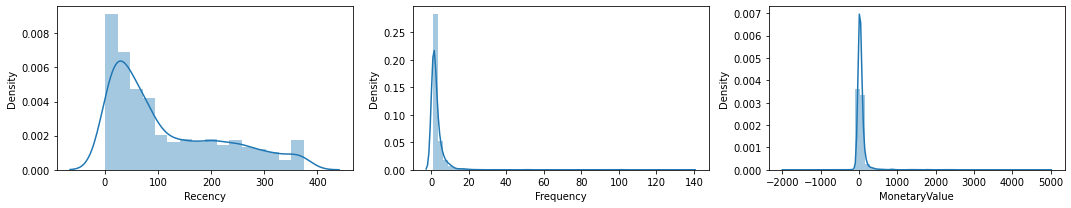

In [159]:
#Understanding the RFM Distribution

print('\033[1mRMF Variables Distribution'.center(100))

n=3
nf = [i for i in customers.columns if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(customers[nf[c]])
plt.tight_layout()
plt.show()

# plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
# for c in range(len(nf)):
#     plt.subplot(math.ceil(len(nf)/n),n,c+1)
#     customers.boxplot(nf[c])
# plt.tight_layout()
# plt.show()

**Inference:** The data does not meet the assumptions where the variables are not squewed and have same mean & variance. Let us try to transform the data. Some of the common transorms are:
* Log Transform
* Sqrt Trasform
* Box-Cox Transform

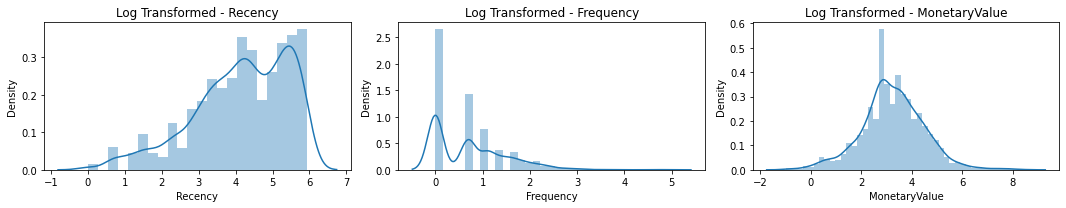

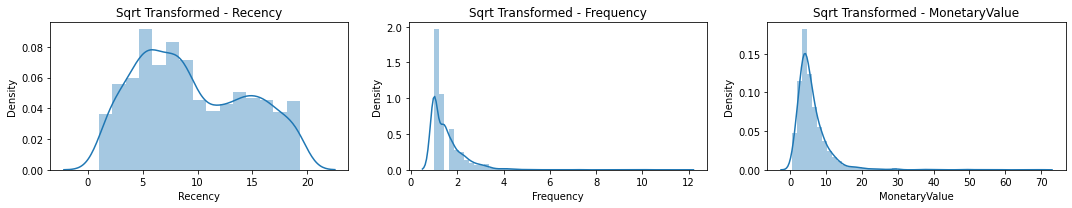

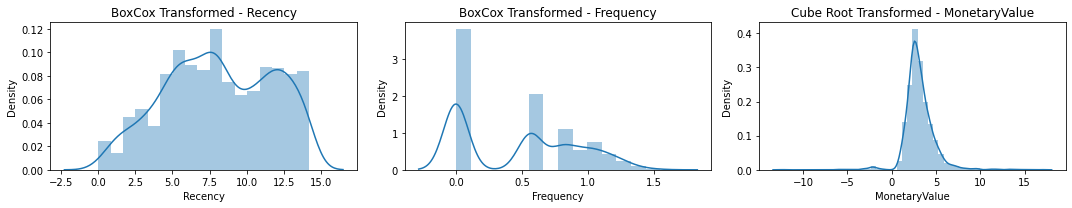

In [143]:
cutomers_logT = customers.copy(deep=True)
cutomers_sqrtT = customers.copy(deep=True)
cutomers_cbrtT = customers.copy(deep=True)
cutomers_bxcxT = customers.copy(deep=True)

for i in customers.columns:
    cutomers_logT[i] = np.log(customers[i])
    cutomers_sqrtT[i] = np.sqrt(customers[i])
    cutomers_cbrtT[i] = np.cbrt(customers[i])
    if i!='MonetaryValue':
        cutomers_bxcxT[i] = stats.boxcox(customers[i])[0]

# plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
# for c in range(len(nf)):
#     plt.subplot(math.ceil(len(nf)/n),n,c+1)
#     sns.distplot(customers[nf[c]])
#     plt.title('Original - {}'.format(nf[c]))
# plt.tight_layout()
# plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(cutomers_logT[nf[c]])
    plt.title('Log Transformed - {}'.format(nf[c]))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(cutomers_sqrtT[nf[c]])
    plt.title('Sqrt Transformed - {}'.format(nf[c]))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)-1):
    plt.subplot(1,3,c+1)
    sns.distplot(cutomers_bxcxT[nf[c]])
    plt.title('BoxCox Transformed - {}'.format(nf[c]))
plt.subplot(1,3,3)
sns.distplot(cutomers_cbrtT[nf[2]])
plt.title('Cube Root Transformed - {}'.format(nf[2]))
plt.tight_layout()
plt.show()

**Inference:** By overserving the plots, it is clear that Recency & Frequency shows more symmetrical form with box-cox transform. Since Monetart Value cannot be represented with Box-cox as it contains negative values, hence we shall use cube root transformation for it.

---

## <center> 3. Data Preprocessing

In [145]:
#Applying the selected Transformations

customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2428,5.144506,1.021167,4.861252
2429,6.148622,0.564199,4.091635
2430,1.272970,0.798349,3.737290
2431,1.671379,1.253008,3.013275
2432,11.514709,0.000000,2.482545


---

## <center> 4. Data Manipulation

In [146]:
#Applying Standardization

scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0. -0. -0.]
[1. 1. 1.]


---

## <center> 5. Predictive Modeling

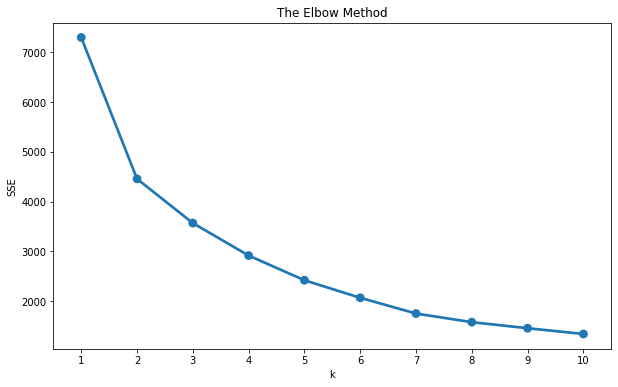

In [147]:
# Building KMeans Algorithm on the dataset

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

#Elbow Plot    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [152]:
#Final Model

model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)

customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         50.45      6.41        144.10   779
1        233.71      1.53         23.22   878
2         45.84      1.48         19.56   776

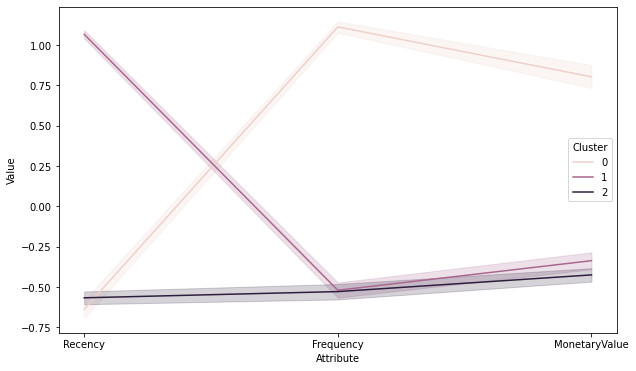

In [151]:
# Visualising the Cluster Chartecteristics

df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()

**Insights:** By using this plot, we know how each segment differs. It describes more than we use the summarized table.
We infer that cluster 0 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.
Then, the cluster 1 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customer.
Finally, the cluster 2 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned customers.

---

## <center>  Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was large enough summing around 5.4 lakh samples & we used a 10k subsamples for creation of the model. 
- For the segmentation we used RMF Technique to create working table as it is most common segmentation technique.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Appropriate Transformations were applied on the data to satisfy the key assumptions. Followed by Standardization.
- K Means algorithm was applied and appropriate cluster number was selected using Elbow Plot.
- The results were interepreted by calculating the cluster means & it was visualised with help of snake plot.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>